# Content
* [1. Data Summary](#1)
* [2. Logit Regression for one variable](#2)
   * [2.1 Default vs Credit score](#2.1)
   * [2.2 Deal vs Credit score](#2.2)
   * [2.3 Deal vs Contact](#2.3)
   * [2.4 logistic regression with multiple variables](#2.4)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

<a id="1"></a>
## 1.Data Summary

In [3]:
data = pd.read_csv(r"C:\Users\221041007\Jupyter_git\Fin-Tech\Assignment1\Input\MDS6212 Week 1 Data.csv",encoding="gbk")
data.head()

,uid,id,provincecode,birthday,age,gender,areaid,provincename,cityname,areaname,...,highcontact,highcontact20s,numbercontacttotal,default_firstmonth_0,default_firstmonth_30,default_firstmonth_60,delaydate_max,default_max_0,default_max_30,default_max_60
0,72146187,1200345737,43,19951203,24,False,431222,湖南省,怀化市,沅陵县,...,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101101513,1200456775,32,19880607,31,False,320382,江苏省,徐州市,邳州市,...,True,True,47,False,False,False,-3.0,False,False,False
2,98608810,1200502203,42,19960503,23,False,420821,湖北省,荆门市,京山县,...,True,True,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96300664,1200424426,51,20000620,19,True,510824,四川省,广元市,苍溪县,...,False,False,0,False,False,False,-23.0,False,False,False
4,105585598,1200512684,32,19940122,25,False,321324,江苏省,宿迁市,泗洪县,...,True,True,46,False,False,False,0.0,False,False,False


In [4]:
data.shape

(5000, 47)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uid                    5000 non-null   int64  
 1   id                     5000 non-null   int64  
 2   provincecode           5000 non-null   int64  
 3   birthday               5000 non-null   int64  
 4   age                    5000 non-null   int64  
 5   gender                 5000 non-null   bool   
 6   areaid                 5000 non-null   int64  
 7   provincename           3164 non-null   object 
 8   cityname               3163 non-null   object 
 9   areaname               3163 non-null   object 
 10  instalments_num        5000 non-null   int64  
 11  instalments_amount     5000 non-null   int64  
 12  shop_address           5000 non-null   object 
 13  trans_date             4996 non-null   object 
 14  taobaostartdate        3794 non-null   object 
 15  taob

In [6]:
data.describe()

,uid,id,provincecode,birthday,age,areaid,instalments_num,instalments_amount,taobaodealno,apptimes,...,yuebaobalance,huabeiamount,huabeibalance,creditlevelasbuyer,tencentscore,gaodescore,numbercontact,numbercontact20s,numbercontacttotal,delaydate_max
count,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.00000,...,5000.000000,5000.000000,5000.000000,4031.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2205.000000
mean,8.111683e+07,1.200468e+09,39.484000,1.991392e+07,27.675400,396256.327200,11.900400,406201.42000,168.486600,1.15960,...,429.160542,1308.978800,582.872618,53.119077,58.608168,0.201975,8.713000,7.092600,105.608800,153.494785
std,2.836443e+07,7.706665e+04,11.870785,8.325553e+04,8.326146,118965.023693,0.766679,130623.36024,4467.552233,0.57358,...,5611.936957,2497.842373,1774.035677,108.629757,14.218112,0.076724,23.833511,17.961619,234.927488,357.255584
min,1.812700e+04,1.200146e+09,11.000000,1.963020e+07,18.000000,110101.000000,6.000000,50000.00000,0.000000,1.00000,...,0.000000,0.000000,-6031.710000,0.000000,9.000000,0.023518,0.000000,0.000000,0.000000,-31.000000
25%,6.425284e+07,1.200404e+09,33.000000,1.987082e+07,21.000000,330326.750000,12.000000,320000.00000,2.000000,1.00000,...,0.000000,0.000000,0.000000,0.000000,53.888889,0.192094,0.000000,0.000000,0.000000,0.000000
50%,9.233801e+07,1.200470e+09,37.000000,1.994030e+07,25.000000,371316.500000,12.000000,398000.00000,34.000000,1.00000,...,0.000000,500.000000,3.075000,14.000000,60.200000,0.192094,3.000000,3.000000,47.000000,0.000000
75%,1.030515e+08,1.200533e+09,51.000000,1.998062e+07,32.000000,510725.000000,12.000000,498000.00000,80.000000,1.00000,...,2.932500,1500.000000,425.752500,58.000000,65.258929,0.192094,10.000000,8.000000,115.000000,6.000000
max,1.128031e+08,1.200601e+09,65.000000,2.001093e+07,56.000000,659001.000000,12.000000,869000.00000,270504.000000,17.00000,...,272288.550000,38000.000000,28551.800000,1830.000000,98.000000,0.732120,1169.000000,751.000000,4964.000000,1000.000000


In [7]:
data.corr()['deal'].sort_values()

tencentscore         -0.213409
gaodescore           -0.105925
instalments_amount   -0.096088
id                   -0.071709
apply_request_sum    -0.065933
apply_reject_sum     -0.062687
age                  -0.056150
loan_offer_sum       -0.032331
areaid               -0.031990
provincecode         -0.031802
repay_fail_sum       -0.019168
instalments_num      -0.004299
taobaodealno          0.002084
numbercontacttotal    0.005232
numbercontact20s      0.018830
numbercontact         0.022857
delaydate_max         0.025641
max_default_days      0.035355
highcontact20s        0.035964
yuebaobalance         0.040148
alipaybalance         0.040259
highcontact           0.041664
birthday              0.056075
gender                0.076812
creditlevelasbuyer    0.129605
nominalrates          0.131284
uid                   0.215884
huabeibalance         0.231817
huabeiamount          0.231949
apptimes              0.237908
deal                  1.000000
Name: deal, dtype: float64

In [8]:
data['default'].value_counts(dropna=False)

NaN      2795
False    1280
True      925
Name: default, dtype: int64

In [9]:
data['deal'].value_counts(dropna=False)

0    2793
1    2207
Name: deal, dtype: int64

In [10]:
data['highcontact'].value_counts(dropna=False)

False    2539
True     2461
Name: highcontact, dtype: int64

In [11]:
pd.get_dummies(data,columns=["highcontact","deal"])

,uid,id,provincecode,birthday,age,gender,areaid,provincename,cityname,areaname,...,default_firstmonth_30,default_firstmonth_60,delaydate_max,default_max_0,default_max_30,default_max_60,highcontact_False,highcontact_True,deal_0,deal_1
0,72146187,1200345737,43,19951203,24,False,431222,湖南省,怀化市,沅陵县,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0
1,101101513,1200456775,32,19880607,31,False,320382,江苏省,徐州市,邳州市,...,False,False,-3.0,False,False,False,0,1,0,1
2,98608810,1200502203,42,19960503,23,False,420821,湖北省,荆门市,京山县,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
3,96300664,1200424426,51,20000620,19,True,510824,四川省,广元市,苍溪县,...,False,False,-23.0,False,False,False,1,0,0,1
4,105585598,1200512684,32,19940122,25,False,321324,江苏省,宿迁市,泗洪县,...,False,False,0.0,False,False,False,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,97368947,1200582090,41,19870821,32,False,411528,河南省,信阳市,息县,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
4996,83278392,1200369370,34,19980626,21,False,341221,安徽省,阜阳市,临泉县,...,False,False,4.0,True,False,False,0,1,0,1
4997,45196409,1200379786,34,19950412,24,False,340321,安徽省,蚌埠市,怀远县,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0
4998,74566336,1200594221,43,19760702,43,True,433022,NaN,NaN,NaN,...,False,False,0.0,False,False,False,0,1,0,1


<a id="2"></a>
## 2Logit Regression

<a id="2.1"> </a>
### 2.1 Default vs Credit score

In [12]:
## Convert default to 0/1
data["default"][data["default"]==False] = 0
data["default"][data["default"]==True] = 1

<ipython-input-12-cc11cdf9ffdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["default"][data["default"]==False] = 0
<ipython-input-12-cc11cdf9ffdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["default"][data["default"]==True] = 1


In [13]:
data['default'].value_counts(dropna=False)

NaN    2795
0.0    1280
1.0     925
Name: default, dtype: int64

In [14]:
## drop null value records in default since it is the target variables
data_default = data[data['default'].notnull()]
data_default.shape

(2205, 47)

In [15]:
##There is null in data
data_default['creditlevelasbuyer'].value_counts(dropna=False)

NaN      354
0.0      345
1.0       69
2.0       42
3.0       40
        ... 
109.0      1
390.0      1
299.0      1
307.0      1
145.0      1
Name: creditlevelasbuyer, Length: 313, dtype: int64

In [16]:
data_default['creditlevelasbuyer'].describe()

count    1851.000000
mean       68.571583
std       125.887370
min         0.000000
25%         3.000000
50%        26.000000
75%        78.000000
max      1830.000000
Name: creditlevelasbuyer, dtype: float64

In [17]:
## Fill the void with mean
data_default['creditlevelasbuyer'][data_default['creditlevelasbuyer'].isnull()] = data_default['creditlevelasbuyer'].mean()
## Fill the void with other related variables
# data_default.corr()['creditlevelasbuyer']

<ipython-input-17-5603ad4d2f49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_default['creditlevelasbuyer'][data_default['creditlevelasbuyer'].isnull()] = data_default['creditlevelasbuyer'].mean()
C:\Users\221041007\Anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [18]:
## Defin X and Y
Y = data_default['default']
X = np.array(data_default['creditlevelasbuyer']).reshape(-1,1)

In [19]:
Y = Y.astype('int')

In [20]:
lg = LogisticRegression()
lg.fit(X,Y)

LogisticRegression()

In [21]:
lg.score(X,Y)

0.5804988662131519

In [22]:
X_sort = data_default['creditlevelasbuyer'].sort_values()
X_sort = np.array(X_sort).reshape(-1,1)

In [23]:
P_1 = lg.predict_proba(X_sort)
P_1

array([[0.57461218, 0.42538782],
       [0.57461218, 0.42538782],
       [0.57461218, 0.42538782],
       ...,
       [0.66972622, 0.33027378],
       [0.68029255, 0.31970745],
       [0.72088527, 0.27911473]])

In [24]:
odds =[]
for i in range(len(P_1)):
    odds.append(P_1[i][1]/P_1[i][0])
odds

[0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235753472,
 0.7403042235

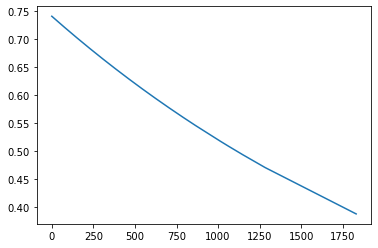

In [25]:
plt.plot(X_sort,odds)

<a id="2.2"> </a>
### 2.2 deal vs Credit score

In [26]:
data['creditlevelasbuyer'].value_counts(dropna=False) ##about 1/10 null value

0.0      1093
NaN       969
1.0       178
2.0       104
3.0        86
         ... 
508.0       1
401.0       1
368.0       1
384.0       1
298.0       1
Name: creditlevelasbuyer, Length: 375, dtype: int64

In [27]:
data['creditlevelasbuyer'].describe() ##about 1/10 null value

count    4031.000000
mean       53.119077
std       108.629757
min         0.000000
25%         0.000000
50%        14.000000
75%        58.000000
max      1830.000000
Name: creditlevelasbuyer, dtype: float64

In [28]:
## Fill na
data['credit_score'] = data['creditlevelasbuyer']
data['credit_score'][data['credit_score'].isnull()] = data["credit_score"].mean()

<ipython-input-28-85ed93057277>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['credit_score'][data['credit_score'].isnull()] = data["credit_score"].mean()


In [29]:
Y2 = data["deal"]
X2 = np.array(data["credit_score"]).reshape(-1,1)

In [30]:
lg2 = LogisticRegression()
lg2.fit(X2,Y2)

LogisticRegression()

In [31]:
lg2.score(X2,Y2)

0.5754

In [32]:
X2_sort = data["credit_score"].sort_values()
## standardlize
X2_plot = (X2_sort-X2_sort.min())/(X2_sort.max()-X2_sort.min())
X2_sort = np.array(X2_sort).reshape(-1,1)

In [33]:
P_2 = lg2.predict_proba(X2_sort)
P_2

array([[0.59366692, 0.40633308],
       [0.59366692, 0.40633308],
       [0.59366692, 0.40633308],
       ...,
       [0.05420594, 0.94579406],
       [0.04093856, 0.95906144],
       [0.00937611, 0.99062389]])

In [34]:
odds =[]
for i in range(len(P_2)):
    odds.append(P_2[i][1]/P_2[i][0])
odds

[0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234523115,
 0.6844462234

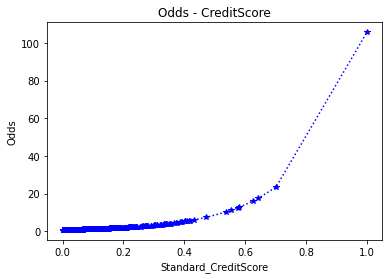

In [35]:
plt.plot(X2_plot,odds,"b:*")
plt.ylabel("Odds")
plt.xlabel("Standard_CreditScore")
plt.title("Odds - CreditScore")
plt.show()

<a id="2.3"> </a>
### 2.3 Deal vs Contact

In [36]:
## See if there is null value in column contact

data["highcontact"].value_counts(dropna=False)

False    2539
True     2461
Name: highcontact, dtype: int64

In [37]:
 ## create dummy valuables for contact
data = pd.get_dummies(data,columns=["highcontact"])


In [38]:
data["highcontact"] = data["highcontact_True"]

In [39]:
X3 = np.array(data["highcontact"]).reshape(-1,1)
Y3 = data["deal"]

In [40]:
lg3 = LogisticRegression()
lg3.fit(X3,Y3)

LogisticRegression()

In [41]:
lg3.score(X3,Y3)

0.5586

In [42]:
P_3 = lg3.predict_proba(X3)
P_3

array([[0.57890218, 0.42109782],
       [0.53765435, 0.46234565],
       [0.53765435, 0.46234565],
       ...,
       [0.53765435, 0.46234565],
       [0.53765435, 0.46234565],
       [0.53765435, 0.46234565]])

In [43]:
odds =[]
for i in range(len(P_3)):
    odds.append(P_3[i][1]/P_3[i][0])
odds

[0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.8599310236939102,
 0.8599310236939102,
 0.8599310236939102,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.7274075538941976,
 0.8599310236939102,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.8599310236939102,
 0.8599310236939102,
 0.7274075538941976,
 0.7274075538941976,
 0.8599310236939102,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538941976,
 0.7274075538

In [44]:
pd.Series(odds).describe()

count    5000.000000
mean        0.792636
std         0.066260
min         0.727408
25%         0.727408
50%         0.727408
75%         0.859931
max         0.859931
dtype: float64

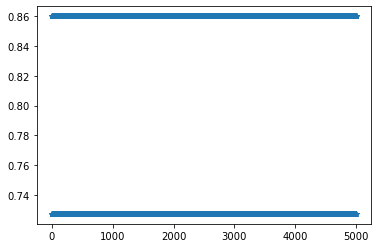

In [45]:
## not useful,only value < 1 means with only high contact, no matter what its value is it will predict it as not a fail deal
plt.plot(odds,"*")

In [46]:
data['credit_score']

0        53.119077
1         1.000000
2         3.000000
3       161.000000
4        29.000000
           ...    
4995    146.000000
4996     17.000000
4997     11.000000
4998     53.119077
4999      9.000000
Name: credit_score, Length: 5000, dtype: float64

<a id="2.4"> </a>
## 2.4 Logist regression with multiple variables

In [47]:
data.corr()["deal"].sort_values()

tencentscore         -0.213409
gaodescore           -0.105925
instalments_amount   -0.096088
id                   -0.071709
apply_request_sum    -0.065933
apply_reject_sum     -0.062687
age                  -0.056150
highcontact_False    -0.041664
loan_offer_sum       -0.032331
areaid               -0.031990
provincecode         -0.031802
repay_fail_sum       -0.019168
instalments_num      -0.004299
taobaodealno          0.002084
numbercontacttotal    0.005232
numbercontact20s      0.018830
numbercontact         0.022857
delaydate_max         0.025641
max_default_days      0.035355
highcontact20s        0.035964
yuebaobalance         0.040148
alipaybalance         0.040259
highcontact           0.041664
highcontact_True      0.041664
birthday              0.056075
gender                0.076812
credit_score          0.116620
creditlevelasbuyer    0.129605
nominalrates          0.131284
uid                   0.215884
huabeibalance         0.231817
huabeiamount          0.231949
apptimes

In [48]:
## take variables: tencent score,gaodescore,apptime,huabeiamount,huabeibalance,nominalrates,credit_score

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uid                    5000 non-null   int64  
 1   id                     5000 non-null   int64  
 2   provincecode           5000 non-null   int64  
 3   birthday               5000 non-null   int64  
 4   age                    5000 non-null   int64  
 5   gender                 5000 non-null   bool   
 6   areaid                 5000 non-null   int64  
 7   provincename           3164 non-null   object 
 8   cityname               3163 non-null   object 
 9   areaname               3163 non-null   object 
 10  instalments_num        5000 non-null   int64  
 11  instalments_amount     5000 non-null   int64  
 12  shop_address           5000 non-null   object 
 13  trans_date             4996 non-null   object 
 14  taobaostartdate        3794 non-null   object 
 15  taob

In [50]:
data["nominalrates"][data["nominalrates"].isnull()] = data["nominalrates"].mean()

<ipython-input-50-de2d83b862e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["nominalrates"][data["nominalrates"].isnull()] = data["nominalrates"].mean()


In [51]:
Y = data["deal"]
X = data[["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]]


In [52]:
lg4 = LogisticRegression()
lg4.fit(X,Y)

LogisticRegression()

In [53]:
lg4.score(X,Y)

0.7078

In [75]:
lg4.coef_[0]

array([ 1.18021588e+00,  6.59119053e-05,  4.39638322e-04,  1.37616783e-01,
       -1.23521099e-04, -3.46274704e-02,  9.37269120e-03])

In [68]:
coef = lg4.coef_[0]
importance = abs(coef)
importance =  (importance/importance.max())

In [60]:
index = ["apptimes","huabeiamount","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore"]

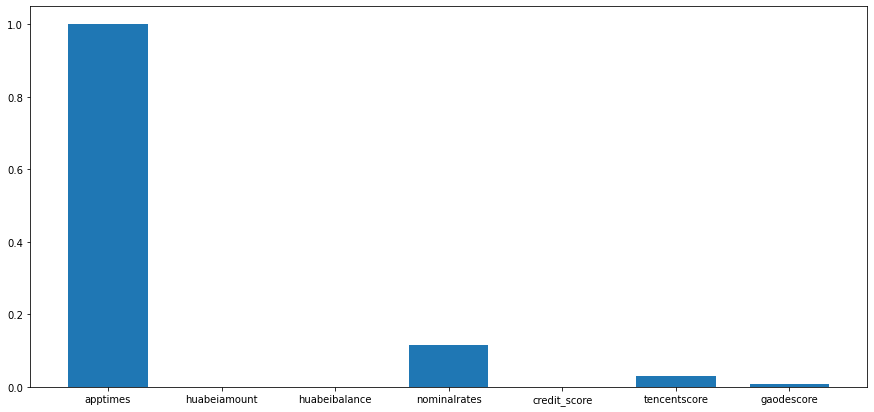

In [74]:
plt.figure(figsize=[15, 7])
plt.bar(index,importance,width=0.7)

plt.show()

In [76]:
data.corr()["apptimes"].sort_values()

id                   -0.151790
highcontact_False    -0.127804
tencentscore         -0.068489
max_default_days     -0.059736
age                  -0.040922
uid                  -0.036182
instalments_amount   -0.023859
gaodescore           -0.012016
yuebaobalance        -0.001816
gender                0.001985
areaid                0.005894
provincecode          0.006104
alipaybalance         0.014274
instalments_num       0.014320
loan_offer_sum        0.016115
huabeibalance         0.025768
repay_fail_sum        0.026974
credit_score          0.028913
creditlevelasbuyer    0.031294
huabeiamount          0.033045
apply_reject_sum      0.039026
birthday              0.040825
apply_request_sum     0.043497
nominalrates          0.061899
numbercontacttotal    0.070455
delaydate_max         0.079056
highcontact20s        0.126409
highcontact           0.127804
highcontact_True      0.127804
deal                  0.237908
taobaodealno          0.368402
numbercontact20s      0.404202
numberco

In [84]:
Y = data["deal"]
X = data[["apptimes","huabeibalance","nominalrates","credit_score","tencentscore","gaodescore","gender"]]
lg = LogisticRegression()
lg.fit(X,Y)
lg.score(X,Y)

0.7096

In [85]:
lg4.coef_[0]

array([ 1.18021588e+00,  6.59119053e-05,  4.39638322e-04,  1.37616783e-01,
       -1.23521099e-04, -3.46274704e-02,  9.37269120e-03])

In [88]:
data.corr()["credit_score"].sort_values()

tencentscore         -0.170965
gaodescore           -0.133872
areaid               -0.072999
provincecode         -0.072480
uid                  -0.058996
age                  -0.046047
max_default_days     -0.038391
delaydate_max        -0.027854
instalments_num      -0.017872
highcontact_False    -0.017035
nominalrates          0.005417
id                    0.006162
highcontact_True      0.017035
highcontact           0.017035
highcontact20s        0.020100
apptimes              0.028913
yuebaobalance         0.031838
alipaybalance         0.033804
numbercontact20s      0.039533
taobaodealno          0.043932
birthday              0.046051
numbercontact         0.046830
apply_reject_sum      0.054332
apply_request_sum     0.063123
numbercontacttotal    0.080546
instalments_amount    0.089846
deal                  0.116620
repay_fail_sum        0.130759
loan_offer_sum        0.154193
gender                0.195363
huabeibalance         0.277297
huabeiamount          0.478334
credit_s

In [87]:
data.corr()["gaodescore"].sort_values()

huabeiamount         -0.209540
age                  -0.195603
huabeibalance        -0.159380
creditlevelasbuyer   -0.152636
credit_score         -0.133872
deal                 -0.105925
loan_offer_sum       -0.060457
repay_fail_sum       -0.051138
gender               -0.042513
numbercontacttotal   -0.042487
nominalrates         -0.035584
yuebaobalance        -0.032744
alipaybalance        -0.028977
numbercontact20s     -0.028726
numbercontact        -0.028267
highcontact_False    -0.022469
instalments_num      -0.016450
taobaodealno         -0.014724
instalments_amount   -0.013447
apptimes             -0.012016
max_default_days      0.016305
highcontact           0.022469
highcontact_True      0.022469
highcontact20s        0.028814
apply_request_sum     0.032541
delaydate_max         0.050073
uid                   0.051218
apply_reject_sum      0.059659
tencentscore          0.112779
id                    0.113125
provincecode          0.120738
areaid                0.120951
birthday